In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california_housing = fetch_california_housing()

data = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
data['PRICE'] = california_housing.target

df = data.head(4000)




In [15]:
X= df.drop('PRICE' , axis=1) 

y= df['PRICE']

In [16]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

elastic_net = ElasticNet()

In [18]:
from sklearn.preprocessing  import StandardScaler  
scaler = StandardScaler() 

X_train= scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

In [19]:
parameters = {'alpha': [0.1, 1.0, 10.0, 50.0, 100.0],
              'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

In [20]:
grid_cv = GridSearchCV(elastic_net, parameters, scoring='neg_mean_squared_error', cv=10)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 50.0, 100.0],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             scoring='neg_mean_squared_error')

In [21]:
best_alpha = grid_cv.best_params_['alpha']
best_l1_ratio = grid_cv.best_params_['l1_ratio'] 


print(f'Best alpha: {best_alpha}')
print(f'Best l1_ratio: {best_l1_ratio}')

Best alpha: 0.1
Best l1_ratio: 0.1


In [22]:
best_model = grid_cv.best_estimator_
y_pred = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = best_model.score(X_test, y_test)

In [23]:
print(f'Mean Squared Error on test set: {mse:.2f}')
print(f'R-squared on test set: {r2:.2f}')


Mean Squared Error on test set: 0.30
R-squared on test set: 0.69


c:\Users\Jayraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


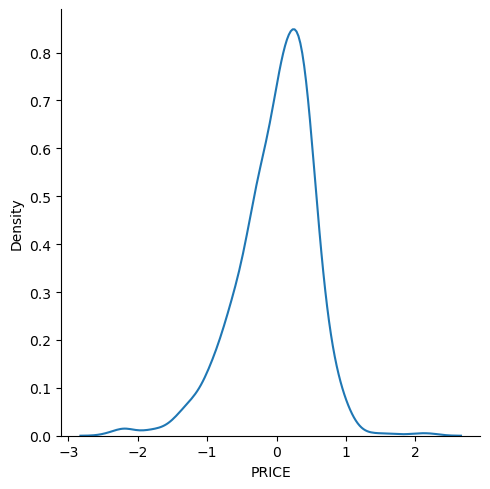

In [24]:
import seaborn as sns  

sns.displot(y_pred-y_test  , kind='kde')